# Search Terms

This project starts with curated collections of terms, including ERP terms, and potential associations, such as cognitive and disease terms. Automated literature collection then collects information from papers using those terms, using [LISC](https://lisc-tools.github.io/). 

Current analysis takes two forms:
- `Words` analyses: analyses text data from articles that discuss ERP related research
    - This approach collects text and metadata from papers, and builds data driven profiles for ERP components
- `Count` analyses: searches for co-occurences of terms, between ERPs and associated terms
    - This approach looks for patterns based on how commonly terms occur together

This notebook introduces the terms that are used in the project.

In [1]:
from collections import Counter

# Import Base LISC object to load and check search terms
from lisc.objects.base import Base
from lisc.utils.io import load_txt_file

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_latencies

In [4]:
# Set the location of the terms
term_dir = '../terms/'

In [5]:
# Load a test object to check the terms
erps = Base()

## ERP Terms

In [6]:
# Load erps and labels terms from file
erps.add_terms('erps.txt', directory=term_dir)
erps.add_labels('erp_labels.txt', directory=term_dir)

In [7]:
# Check the number of ERP terms
print('Number of ERP terms: {}'.format(erps.n_terms))

Number of ERP terms: 98


In [8]:
# Add exclusion words
erps.add_terms('erps_exclude.txt', term_type='exclusions', directory=term_dir)

In [9]:
# Check the exclusion terms used
erps.check_terms('exclusions')

List of exclusions used: 

P100   : gene, virus, protein, proteins, cancer, acid, skin, cytokine, bacteria, respirators, amino, transcription, antibody
P110   : protein, proteins, cancer, genetics, cell, postnatal, carbon, insulin, kinase, RNA, HIV, nanoparticle, probiotics, lymphoma, CO2, sequencing, peptide, amino
P120   : cancer, protein, proteins, tumor, cell, cells, laser, virus, gene, hormonal, mice, exercise, postnatal, molecular, particle, plasmid, inflammation, pregnancy, hydrolase, oxidative, glucose, QRS, bone, cadherin, Wnt, platelet, RNA
P150   : protein, proteins, cell, dna, dynein, adhesion, cardiac, dynactin, phosphatidylcholines, phosphorus, metabolite, pregabalin, genes, molecular, vaccine
P160   : proteins, protein, peptide, tumor, cancer, steroid, gene, genetics, cell, vascular, platelets, phosphorus, postnatal, metabolic, estrogen, kinase
P170   : protein, proteins, topoisomerase, cancer, virus, kinase, cells, leukemia, lactic, lactis, thyroid, chromosome, cDNAs
P1

## Latencies

In [10]:
# Load canonical latency information
labels = load_txt_file('erp_labels.txt', term_dir, split_elements=False)
latencies = load_txt_file('latencies.txt', term_dir, split_elements=False)
latency_dict = {label : latency.split(', ') for label, latency in zip(labels, latencies)}

In [11]:
# Extract the labelled polarities and latencies for each ERP
polarities = [el[0] for el in latency_dict.values()]
latencies = [int(el[1]) for el in latency_dict.values()]

In [12]:
# Check the count of polarities
polarity_counts = Counter(polarities)
print(polarity_counts)

Counter({'N': 62, 'P': 36})


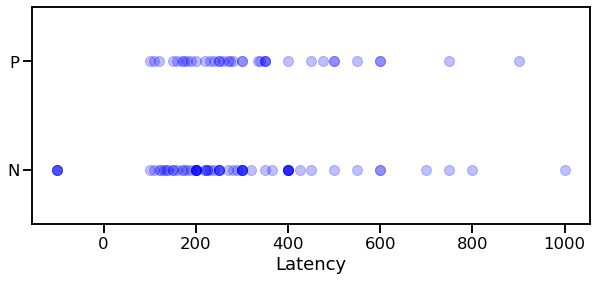

In [13]:
# Plot the ERP latencies
plot_latencies(polarities, latencies)

In [14]:
print('Typical ERP latency:')
for label, lat in zip(labels, latencies):
    print('  {:s}\t\t{:4d}'.format(label, lat))

Typical ERP latency:
  P100		 100
  P110		 110
  P120		 120
  P150		 150
  P160		 160
  P170		 170
  P180		 180
  P190		 190
  P200		 200
  P220		 220
  P230		 230
  P240		 240
  P250		 250
  P260		 260
  P270		 270
  P300		 300
  P3a		 275
  P3b		 300
  P340		 340
  P350		 350
  P400		 400
  P500		 500
  P550		 550
  P600		 600
  P900		 900
  N100		 100
  N110		 110
  N120		 120
  N130		 130
  N135		 135
  N140		 140
  N150		 150
  N160		 160
  N170		 170
  N180		 180
  N190		 190
  N200		 200
  N2a		 200
  N2b		 200
  N2c		 200
  N2pc		 225
  N220		 220
  N230		 230
  N240		 240
  N250		 250
  N270		 270
  N280		 280
  N290		 290
  N300		 300
  N320		 320
  N350		 350
  N400		 400
  N450		 450
  N550		 550
  N600		 600
  N700		 700
  MMN		 200
  CDA		 600
  LPC		 450
  LPP		 500
  NSW		 750
  PSW		 750
  VPP		 175
  CNV		 365
  PINV		1000
  ELAN		 200
  LAN		 400
  CPS		 350
  LRP		-100
  LDN		 400
  ORN		 175
  BP		-100
  ERN		 125
  Pe		 350
  CRN		 150
  MFN		 300
  SPeN		-100
  F

## Cognitive Terms

In [15]:
# Load cognitive terms from file
cogs = Base()
cogs.add_terms('cognitive.txt', directory=term_dir)

In [16]:
# Check the number of ERP terms
print('Number of cognitive terms: {}'.format(cogs.n_terms))

Number of cognitive terms: 38


In [17]:
# Check the cognitive terms used
cogs.check_terms()

List of terms used: 

anticipation        : anticipation, expectation, preparation
attention           : attention, attentional
arousal             : arousal
auditory            : auditory, audition
categorization      : categorization
cognitive control   : cognitive control
comprehension       : comprehension
conflict            : conflict
conscious           : conscious, consciousness, awareness
decision making     : decision making
emotion             : emotion, emotional, mood
error               : error
executive function  : executive function, executive functions
face                : face, facial
fear                : fear
intelligence        : intelligence, knowledge
language            : language
learning            : learning
memory              : memory
motor               : motor, movement, motion
music               : music, musical
pain                : pain, nociception
perception          : perception
phonology           : phonology, phonological, phonetic, phonetics
pr

## Disease Terms

In [18]:
# Load the disease terms from file
disease = Base()
disease.add_terms('disorders.txt', directory=term_dir)

In [19]:
# Check the number of ERP terms
print('Number of disease terms: {}'.format(disease.n_terms))

Number of disease terms: 24


In [20]:
# Check the disease terms
disease.check_terms()

List of terms used: 

alcoholism               : alcoholism, alcohol dependence, alcohol abuse
addiction                : addiction, substance abuse
ADHD                     : ADHD, attention deficit hyperactivity disorder
alzheimer                : alzheimer, alzheimer's
anxiety                  : anxiety
autism                   : autism
bipolar                  : bipolar
coma                     : coma
dementia                 : dementia
depression               : depression, major depressive disorder
dyslexia                 : dyslexia
epilepsy                 : epilepsy, seizure
intellectual disability  : intellectual disability, mental retardation
language impairment      : language impairment, aphasia
migraine                 : migraine, headache
MCI                      : MCI, mild cognitive impairment, cognitive decline
multiple sclerosis       : multiple sclerosis
OCD                      : OCD, obsessive compulsive disorder
parkinson                : parkinson, parkinson's
P